#Stable Diffusion - Text-to-Image Generation

> **Note:** This notebook requires an **NVIDIA GPU with at least 10GB VRAM**.

Stable Diffusion is a **latent text-to-image diffusion model** developed by [CompVis](https://github.com/CompVis), [Stability AI](https://stability.ai/), and [LAION](https://laion.ai/).  
It is trained on **512×512 images** from a curated subset of the [LAION-5B](https://laion.ai/blog/laion-5b/) dataset.

Key features:
- Uses a **frozen CLIP ViT-L/14** text encoder for prompt conditioning
- Built with a **860M parameter UNet** and **123M parameter text encoder**
- Optimized for **efficient performance** on modern consumer GPUs


In [20]:
pip install torch torchvision torchaudio

In [22]:
import torch

if torch.cuda.device_count() >= 1:
    print(f"You're all set! GPU detected: {torch.cuda.get_device_name(0)}")
else:
    print("ERROR: No GPU detected. This notebook requires an NVIDIA GPU.")

You're all set! GPU detected: Tesla T4


##For getting Started with Stable diffusion

You need to follow these steps to download the pre-trained stable diffusion model from Hugging Face:

1. First you need to [create a Hugging Face account](https://huggingface.co/join) if you don't have one already
2. Than Visit https://huggingface.co/CompVis/stable-diffusion-v1-4 and agree to Hugging Face's conditions to access the model
3. Sign in to your Hugging Face account and [generate a token](https://huggingface.co/docs/hub/security-tokens#user-access-tokens)
4. Run the next cell to sign into Hugging Face with your token



In [32]:
from huggingface_hub import HfFolder, notebook_login
from os import environ

token = environ.get("HUGGING_FACE_TOKEN")
if token != None:
    HfFolder.save_token(token)
else:
    notebook_login()

In [24]:
from diffusers import StableDiffusionPipeline

pipe = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4", use_auth_token=True)

Keyword arguments {'use_auth_token': True} are not expected by StableDiffusionPipeline and will be ignored.


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [25]:
device="cuda"
pipe = pipe.to(device)

## Create New Image using prompt

Update this `prompt` and run the following cells to create original image generated by stabe diffusion.
You can run these cells as many times as you'd like.
Each run generates an original image!


In [30]:
from diffusers import StableDiffusionPipeline
import torch
from torch import autocast  # parfois non nécessaire selon le contexte

# Charger le modèle (par exemple Stable Diffusion v1.5)
model_id = "runwayml/stable-diffusion-v1-5"

# Créer le pipeline
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe.to("cuda")  # ou "cpu" si tu n'as pas de GPU

# Prompt d'exemple
prompt = "A high-resolution photo of a modern city skyline at sunset, with glass skyscrapers reflecting the orange sky, natural lighting, clear weather, realistic details"

# Génération d'image
with torch.autocast("cuda"):  # ou "cpu" si tu travailles sans GPU
    image = pipe(prompt).images[0]

# Affichage
image.show()


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

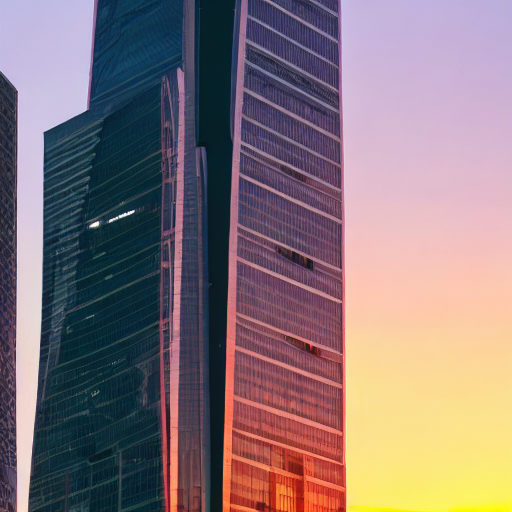

In [31]:
from IPython.display import display
image = pipe(prompt).images[0]
display(image)
